In [62]:
import torch

In [63]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
# calculates the local gradients, and goes back to leaf nodes for backward prop
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Implementing Linear Regression (Manual)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

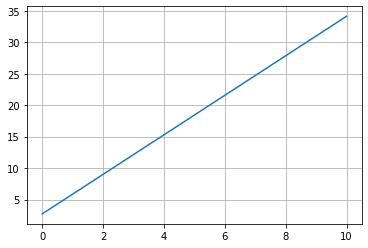

In [65]:
# f = 2*x
X = np.array(np.linspace(0,10, num=11), dtype=np.float32)
Y = 3.1415*X + 2.718

plt.figure()
plt.plot(X, Y)
plt.grid()

In [66]:
def forward(x, w):
    return w[0] + w[1]*x

def loss(y, y_pred, reg=0.1):
    return np.mean((y_pred - y)**2)/2 + reg*np.mean(w[1:]**2)/(2*len(y)), reg*np.mean(w[1:]**2)/(2*len(y))

# gradient
def gradient(x, y, y_predicted, w, reg=0.1):
    # [dw_0, dw_1]
    return np.array([np.mean(y_predicted-y), np.mean(np.dot(2*x, y_predicted-y)) + reg*w[1]/len(y)])

In [67]:
alpha = 0.001
iters = 1000
reg = 100
w_ = np.array([3, 1], dtype=np.float32)

In [68]:
w = w_
print(f"Prediction before training: f(5) = {(forward(5, w)):.3f}")

for epoch in range(iters):
    y_pred = forward(X, w)
    l, l_reg = loss(Y, y_pred, reg)
    dw = gradient(X, Y, y_pred, w, reg)
    w -= alpha*dw
    if epoch % (iters/10) == 0:
        print(f'epoch: {epoch+1} : b = {w[0]:.3f}, w = {w[1]:.3f}, loss = {l:.8f}, loss_reg = {l_reg:.3f}')

print(f"Prediction after training: f(5) = {(forward(5, w)):.3f}")

Prediction before training: f(5) = 8.000
epoch: 1 : b = 3.010, w = 2.609, loss = 81.82109694, loss_reg = 4.545
epoch: 101 : b = 3.023, w = 3.062, loss = 42.64893521, loss_reg = 42.613
epoch: 201 : b = 3.032, w = 3.061, loss = 42.61347064, loss_reg = 42.577
epoch: 301 : b = 3.041, w = 3.059, loss = 42.57907646, loss_reg = 42.541
epoch: 401 : b = 3.050, w = 3.058, loss = 42.54571316, loss_reg = 42.507
epoch: 501 : b = 3.058, w = 3.057, loss = 42.51335308, loss_reg = 42.474
epoch: 601 : b = 3.066, w = 3.056, loss = 42.48195214, loss_reg = 42.442
epoch: 701 : b = 3.074, w = 3.055, loss = 42.45149600, loss_reg = 42.411
epoch: 801 : b = 3.082, w = 3.053, loss = 42.42195320, loss_reg = 42.380
epoch: 901 : b = 3.090, w = 3.052, loss = 42.39328883, loss_reg = 42.351
Prediction after training: f(5) = 18.354


# Implementing Linear Regression (Semi-Torch)

In [69]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

In [70]:
def forward(X):
    return w*X

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [71]:
learning_rate = 0.01
n_iters = 69

In [72]:
num = 5
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

print(f'Prediction before training: f({num}) = {forward(num):.3f}')

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    # backward pass
    l.backward() # dl/dw
    dw = w.grad
    with torch.no_grad():
        w -= learning_rate * dw
    w.grad.zero_()
    if epoch % (n_iters//10) == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f({num}) = {forward(num):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 7: w = 1.359, loss = 4.26725292
epoch 13: w = 1.758, loss = 0.60698116
epoch 19: w = 1.909, loss = 0.08633806
epoch 25: w = 1.966, loss = 0.01228084
epoch 31: w = 1.987, loss = 0.00174685
epoch 37: w = 1.995, loss = 0.00024848
epoch 43: w = 1.998, loss = 0.00003534
epoch 49: w = 1.999, loss = 0.00000503
epoch 55: w = 2.000, loss = 0.00000071
epoch 61: w = 2.000, loss = 0.00000010
epoch 67: w = 2.000, loss = 0.00000001
Prediction after training: f(5) = 10.000


# Implementing Linear Regression (Near-Torch)

In [73]:
import torch
import torch.nn as nn

In [74]:
X : torch.Tensor = torch.tensor([1,2,3,4], dtype=torch.float32)
Y : torch.Tensor = torch.tensor([2,4,6,8], dtype=torch.float32)
w = torch.tensor(0.0, requires_grad=True)

In [75]:
learning_rate : float = 0.01
n_iters : int = 69

In [76]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

In [77]:
def forward(X):
    return w*X

In [78]:
num = 5

print(f'Prediction before training: f({num}) = {forward(num):.3f}')

for epoch in range(n_iters):
    if epoch % (n_iters//10) == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

print(f'Prediction after training: f({num}) = {forward(num):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.000, loss = 0.00000001
epoch 7: w = 1.246, loss = 5.90623236
epoch 13: w = 1.716, loss = 0.84011245
epoch 19: w = 1.893, loss = 0.11949898
epoch 25: w = 1.960, loss = 0.01699772
epoch 31: w = 1.985, loss = 0.00241778
epoch 37: w = 1.994, loss = 0.00034392
epoch 43: w = 1.998, loss = 0.00004891
epoch 49: w = 1.999, loss = 0.00000696
epoch 55: w = 2.000, loss = 0.00000099
epoch 61: w = 2.000, loss = 0.00000014
epoch 67: w = 2.000, loss = 0.00000002
Prediction after training: f(5) = 10.000


# Implementing Linear Regression (Completely PyTorch)

In [79]:
import torch
import torch.nn as nn

In [80]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [81]:
learning_rate = 0.01
n_iters = 150

In [82]:
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

In [83]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [84]:
X_test = torch.tensor([5], dtype=torch.float32)

In [85]:
print(f'Prediction before training: f({X_test[0].item()}) = {model(X_test).item():.3f}')

for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    # I don't understand how is loss and the optimizer connected?
    optimizer.step()
    optimizer.zero_grad()
    if epoch % (n_iters//10) == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f({X_test[0].item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 5.070
epoch 1: w = 1.097, loss = 6.73516607
epoch 16: w = 1.765, loss = 0.07969748
epoch 31: w = 1.816, loss = 0.04755553
epoch 46: w = 1.827, loss = 0.04335935
epoch 61: w = 1.835, loss = 0.03962892
epoch 76: w = 1.842, loss = 0.03621986
epoch 91: w = 1.849, loss = 0.03310408
epoch 106: w = 1.856, loss = 0.03025628
epoch 121: w = 1.862, loss = 0.02765350
epoch 136: w = 1.868, loss = 0.02527460
Prediction after training: f(5.0) = 9.739


In [86]:
# custom linear regression model
class LinearRegress(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegress, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

In [87]:
model = LinearRegress(input_size, output_size)